#**Boston Housing**

#**About Dataset**
1.**crim**: Per capita crime rate by town.

2.**zn**: Proportion of large residential lots (over 25,000 sq. ft.).

3.**indus**: Proportion of non-retail business acres per town.

4.**Chas**: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).

5.**nox**: Concentration of nitrogen oxides in the air.

6.**rm**: Average number of rooms per dwelling.

7.**age**: Proportion of old owner-occupied units built before 1940.

8.**dis**: Weighted distances to Boston employment centers.

9.**rad**: Index of accessibility to radial highways.

10.**tax**: Property tax rate per $10,000.

These features provide valuable information about the characteristics of neighborhoods that can influence housing prices.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
df=pd.read_csv('/content/BostonHousing (1).csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#**Simple Linear Regression Problems**

In [ ]:
# 1. Predict the median value of homes (medv) using the per capita crime rate (crim).

# load data
import pandas as pd
df = pd.read_csv("/content/BostonHousing (1).csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


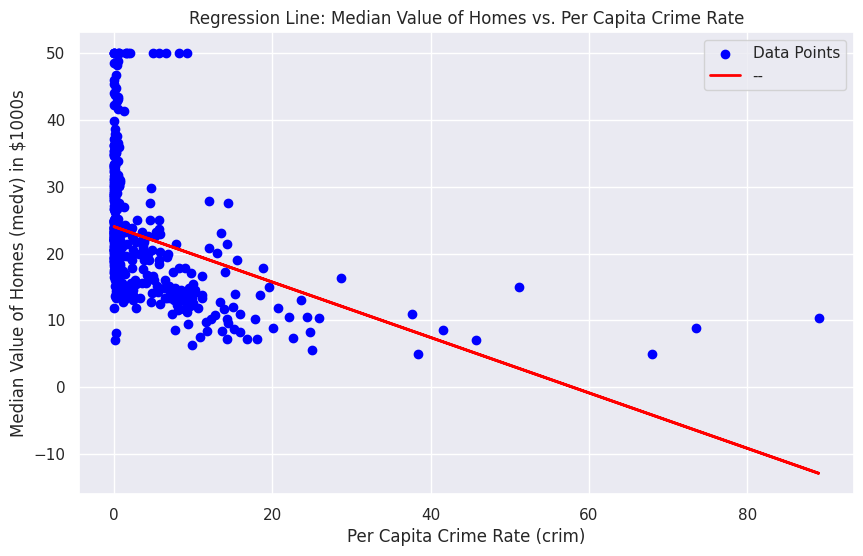

In [ ]:
# median value of homes(medv)using the per capita crime rate(crim)
per_capita_crime_rate = df["crim"]
median_value = df["medv"]

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression # Import the LinearRegression model
sns.set()

# Create and fit the model
X = df[['crim']]  # Reshape data for scikit-learn
model = LinearRegression()
model.fit(X, df['medv'])

# Scatter plot of the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(df['crim'], df['medv'], color='blue', label='Data Points') # Use 'df' instead of 'data'

# Plot the regression line
plt.plot(df['crim'], model.predict(X), color='red', linewidth=2, label='--')

# Adding labels and title
plt.xlabel('Per Capita Crime Rate (crim)')
plt.ylabel('Median Value of Homes (medv) in $1000s')
plt.title('Regression Line: Median Value of Homes vs. Per Capita Crime Rate')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 2. Predict the median value of homes (medv) using the proportion of residential land zoned for large lots (zn).

# load data
import pandas as pd
df = pd.read_csv("/content/BostonHousing (1).csv")
df.head()

# check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
# median value of homes (medv) using the proportion of residential land zoned for large lots (zn).
median_value = df["medv"]
proportion_zoned = df["zn"]

# Create and fit the model
model = LinearRegression()
model.fit(proportion_zoned.values.reshape(-1, 1), median_value)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)




Slope: 0.14213999415535442
Intercept: 20.917579117799832


Slope: -0.6484900536157151
Intercept: 29.75489651192849


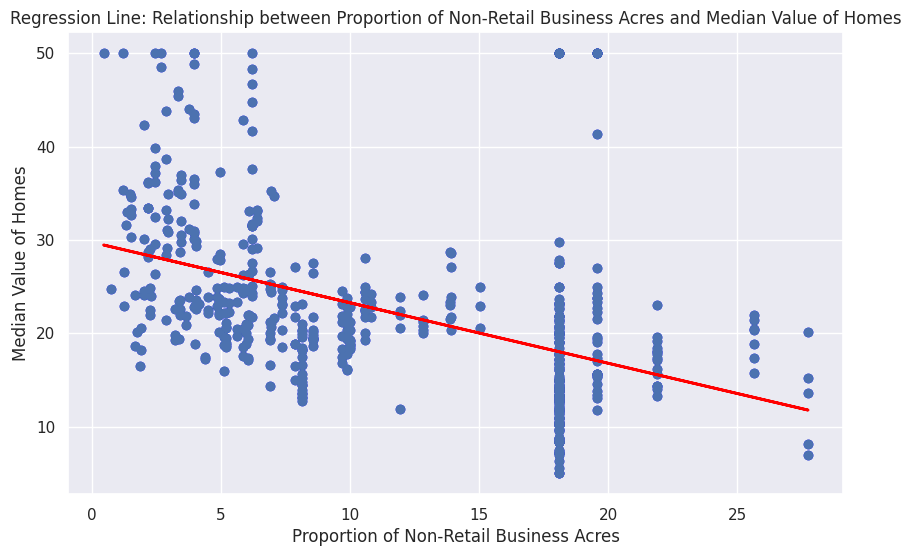

In [ ]:
#3. Predict the median value of homes (medv) using the proportion of non-retail business acres (indus).

median_value = df["medv"]
proportion_non_retail = df["indus"]

# Create and fit the model
model = LinearRegression()
model.fit(proportion_non_retail.values.reshape(-1, 1), median_value)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression # Import the LinearRegression model
sns.set()

# plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(proportion_non_retail, median_value, color='blue', label='--')
plt.plot(proportion_non_retail, model.predict(proportion_non_retail.values.reshape(-1, 1)), color='red', linewidth=2, label='--')

plt.scatter(proportion_non_retail, median_value)
plt.xlabel("Proportion of Non-Retail Business Acres")
plt.ylabel("Median Value of Homes")
plt.title("Regression Line: Relationship between Proportion of Non-Retail Business Acres and Median Value of Homes")
plt.show()


The slope of the model is 6.35
The intercept of the model is 22.09


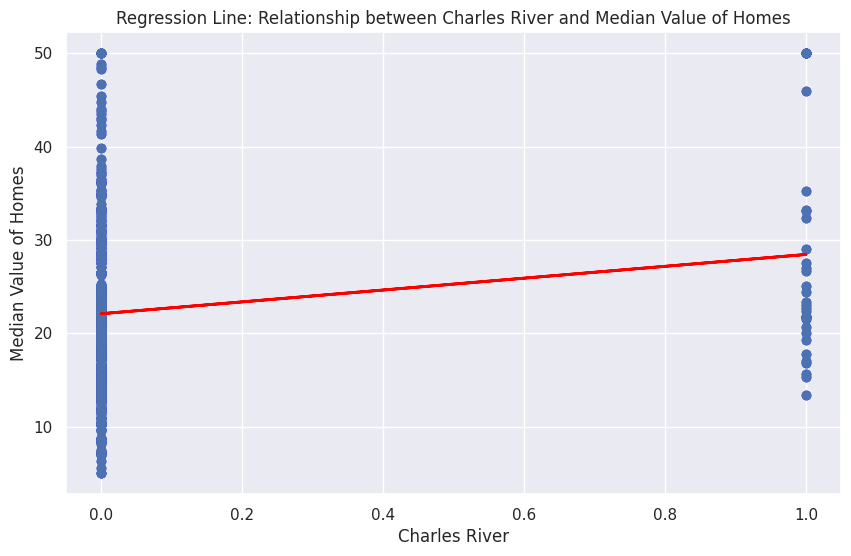

Slope: 6.346157112526537


In [ ]:
# 4. Predict the median value of homes (medv) using the Charles River dummy variable (chas).
median_value = df["medv"]
charles_river = df["chas"]

# Create and fit the model
model = LinearRegression()
model.fit(charles_river.values.reshape(-1, 1), median_value)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"The slope of the model is {slope:.2f}")
print(f"The intercept of the model is {intercept:.2f}")

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(charles_river, median_value, color='blue', label='Data Points')
plt.plot(charles_river, model.predict(charles_river.values.reshape(-1, 1)), color='red', linewidth=2, label='--')
plt.scatter(charles_river, median_value)
plt.xlabel("Charles River")
plt.ylabel("Median Value of Homes")
plt.title("Regression Line: Relationship between Charles River and Median Value of Homes")
plt.show()

# Print the results
print("Slope:", slope)

Slope: -33.916055008661104
Intercept: 41.345874467973246


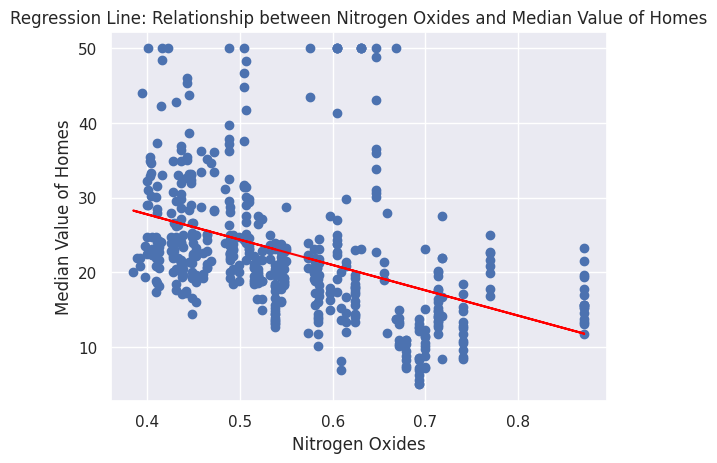

In [ ]:
# 5. Predict the median value of homes (medv) using nitrogen oxides concentration (nox).

median_value = df["medv"]
nitrogen_oxides = df["nox"]

# Create and fit the model
model = LinearRegression()
model.fit(nitrogen_oxides.values.reshape(-1, 1), median_value)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)

# plot the regression line
plt.scatter(nitrogen_oxides, median_value)
plt.plot(nitrogen_oxides, slope * nitrogen_oxides + intercept, color='red')

# Add labels and title
plt.xlabel("Nitrogen Oxides")
plt.ylabel("Median Value of Homes")
plt.title("Regression Line: Relationship between Nitrogen Oxides and Median Value of Homes")
plt.show()

Slope: 9.109202115378313
Intercept: -34.71252889779237


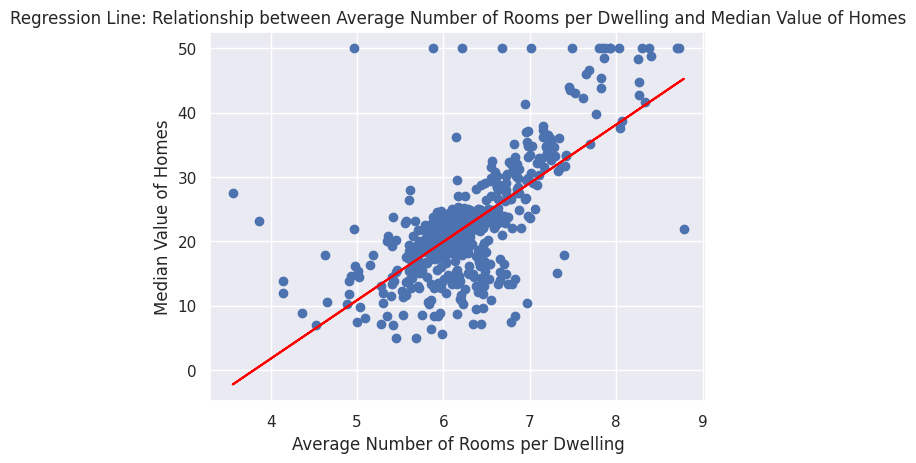

In [ ]:
# 6. Predict the median value of homes (medv) using the average number of rooms per dwelling (rm).
median_value = df["medv"]
average_rooms = df["rm"]

# Handle missing values (NaN) in 'average_rooms' - Replace with mean
average_rooms = average_rooms.fillna(average_rooms.mean()) # Fill NaN with the mean

# Create and fit the model
model = LinearRegression()
model.fit(average_rooms.values.reshape(-1, 1), median_value)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)

# plot the regression line
plt.scatter(average_rooms, median_value)
plt.plot(average_rooms, slope * average_rooms + intercept, color='red')

# Add labels and title
plt.xlabel("Average Number of Rooms per Dwelling")
plt.ylabel("Median Value of Homes")
plt.title("Regression Line: Relationship between Average Number of Rooms per Dwelling and Median Value of Homes")
plt.show()

Slope: -0.1231627212356797
Intercept: 30.97867776261804


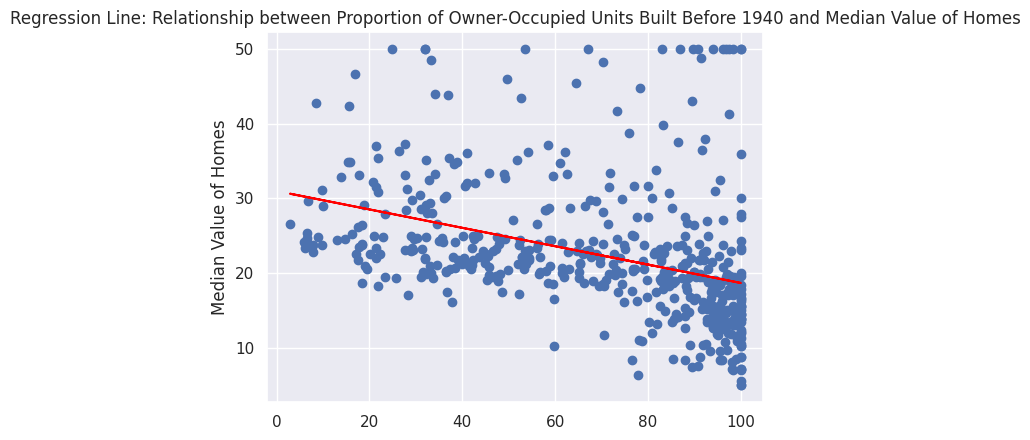

In [ ]:
# 7. Predict the median value of homes (medv) using the proportion of owner-occupied units built before 1940 (age).
median_value = df["medv"]
proportion_owner_occupied = df["age"]

# Create and fit the model
model = LinearRegression()
model.fit(proportion_owner_occupied.values.reshape(-1, 1), median_value)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)

# plot the regression line
plt.scatter(proportion_owner_occupied, median_value)
plt.plot(proportion_owner_occupied, slope * proportion_owner_occupied + intercept, color='red')

# Add labels and title
plt.xlabel
plt.ylabel("Median Value of Homes")
plt.title("Regression Line: Relationship between Proportion of Owner-Occupied Units Built Before 1940 and Median Value of Homes")
plt.show()

In [ ]:
# 8. Predict the median value of homes (medv) using weighted distances to employment centers (dis).
median_value = df["medv"]
weighted_distances = df["dis"]

# create the fit model
model = LinearRegression()
model.fit(weighted_distances.values.reshape(-1, 1), median_value)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)


Slope: 1.0916130158411088
Intercept: 18.390088330493388


In [ ]:
# 9. Predict the mean value of homes (mean) using the index of accessibility to radial highways (rad).
mean_value_of_homes = df["medv"]
index_of_accessibility = df["rad"]
mean_value_of_homes.mean()
index_of_accessibility.mean()

# create the fit model
model = LinearRegression()
model.fit(index_of_accessibility.values.reshape(-1, 1), mean_value_of_homes)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)



Slope: -0.403095395552531
Intercept: 26.382128362272397


In [ ]:
# 10. Predict the median value of homes (medv) using the full-value property tax rate (tax).
median_value = df["medv"]
property_tax_rate = df["tax"]

# Create and fit the model
model = LinearRegression()
model.fit(property_tax_rate.values.reshape(-1, 1), median_value)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

#
print("Slope:", slope)
print("Intercept:", intercept)

Slope: -0.025568099481987298
Intercept: 32.970654493666316


#**Multiple Linear Regression Problems**


In [2]:
# 1. Predicting House Prices Using Crime Rate and Number of Rooms:

# Query: Predict the median value (medv) using the crime rate (crim) and the average number of rooms (rm).

# load data
import pandas as pd
df = pd.read_csv("/content/BostonHousing (1).csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/BostonHousing (1).csv'
data = pd.read_csv(file_path)

# Impute missing values in the 'rm' column with the mean value
data['rm'].fillna(data['rm'].mean(), inplace=True)

# Define the feature columns and target column
X = data[['crim', 'rm']]
y = data['medv']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 41.9641778302915
R^2 Score: 0.4277647214988344
Coefficients: [-0.26004109  8.69962233]
Intercept: -31.21790422652792


In [13]:
# 2. Influence of Accessibility and Property Tax on House Prices:

# Query: Predict the median value (medv) using the index of accessibility to radial highways (rad) and the property tax rate (tax).

# load data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # Changed import to r2_score

# Load the dataset
file_path = '/content/BostonHousing (1).csv'
data = pd.read_csv(file_path)

# Define the feature columns and target column
X = data[['rad', 'tax']]
y = data['medv']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # Use r2_score

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 53.142211017531935
R^2 Score: 0.2753379312048859
Coefficients: [ 0.20851406 -0.03565736]
Intercept: 35.25230887263761


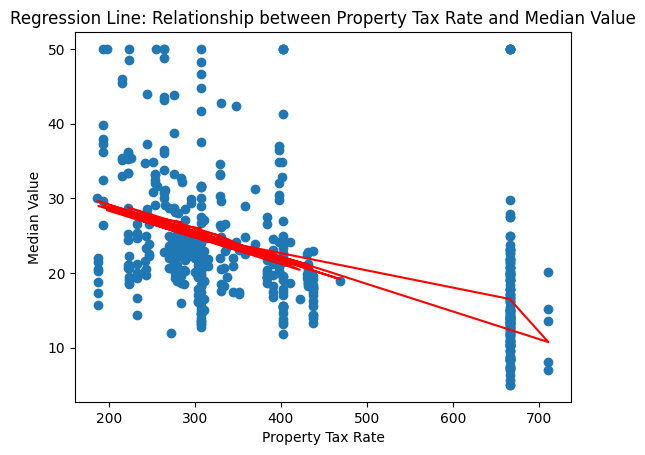

In [21]:
# plot the regression line
plt.scatter('tax','medv', data=df) # Changed 'rad' to 'medv' to match the target variable
plt.plot(df['tax'], model.predict(df[['rad', 'tax']]), color='red', label='--') # Include both 'rad' and 'tax' for prediction
plt.xlabel("Property Tax Rate")
plt.ylabel("Median Value") # Changed y-axis label to reflect 'medv'
plt.title("Regression Line: Relationship between Property Tax Rate and Median Value")
plt.show()

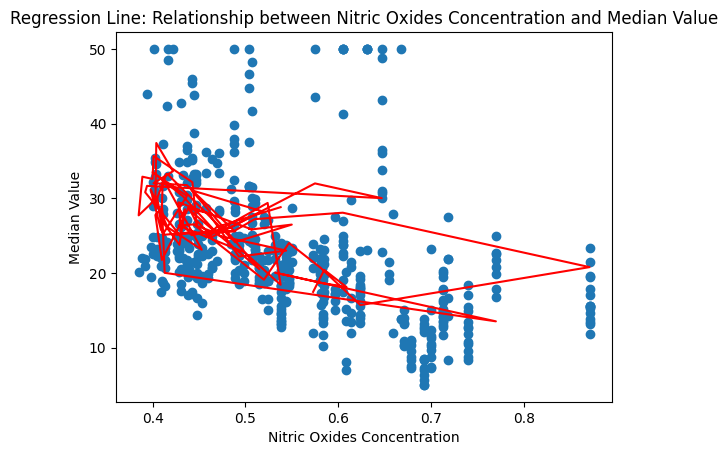

Mean Squared Error: 42.16018940411944
R^2 Score: 0.425091852796569
Coefficients: [-27.39630555  -1.8235095 ]
Intercept: 71.44576938542903


In [24]:
# 3.Impact of Nitric Oxides and Pupil-Teacher Ratio on House Prices:

# Query: Predict the median value (medv) using nitric oxides concentration (nox) and pupil-teacher ratio (ptratio).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/BostonHousing (1).csv' # Fixed: Removed pd.read()
data = pd.read_csv(file_path) # Use pd.read_csv() to read the CSV file

# define the feature columns and target columns
X = data[['nox', 'ptratio']]
y = data['medv']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model # Moved model fitting before plotting
model = LinearRegression()
model.fit(X_train, y_train)

# plot the regression line
plt.scatter(data['nox'], data['medv'])
plt.plot(data['nox'], model.predict(data[['nox', 'ptratio']]), color='red', label = '--') # Fixed: Added label for the regression line
plt.xlabel("Nitric Oxides Concentration")
plt.ylabel("Median Value")
plt.title("Regression Line: Relationship between Nitric Oxides Concentration and Median Value")
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

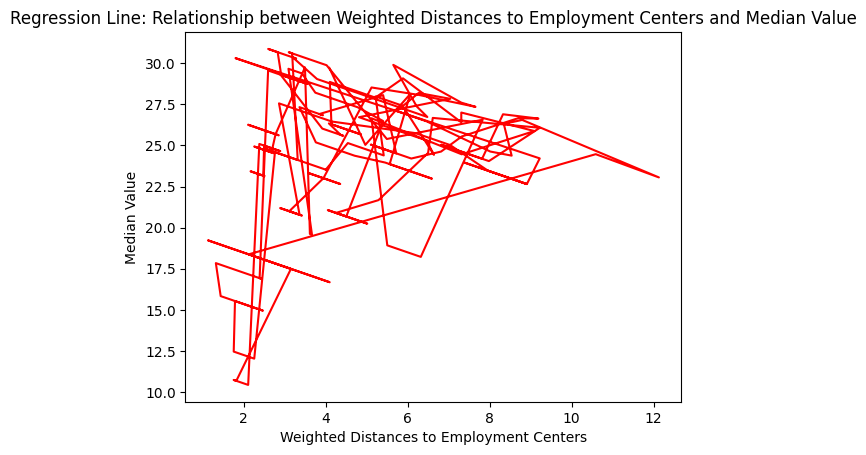

Mean Squared Error: 52.45484789077678
R^2 Score: 0.2847110072570572
Coefficients: [-0.8578532  -0.82453251]
Intercept: 35.12093741047937


In [26]:
# 4. Effect of Distance to Employment Centers and Proportion of Non-retail Business Acres on House Prices:

# Query: Predict the median value (medv) using weighted distances to employment centers (dis) and proportion of non-retail business acres (indus).

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/BostonHousing (1).csv' # Fixed: Removed pd.read()
data = pd.read_csv(file_path) # Use pd.read_csv() to read the CSV

# define the feature columns and target columns
X = data[['dis', 'indus']]
y = data['medv']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the linear regression model # Moved model fitting before plotting
model = LinearRegression()
model.fit(X_train, y_train)

# plot the regression line
plt.scatter = (data['dis'], data['medv'])
plt.plot(data['dis'], model.predict(data[['dis', 'indus']]), color='red', label = '--') # Fixed: Added label for the regression line
plt.xlabel("Weighted Distances to Employment Centers")
plt.ylabel("Median Value")
plt.title("Regression Line: Relationship between Weighted Distances to Employment Centers and Median Value")
plt.show()

# make prediction on test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


In [34]:
#  5. Relationship Between House Age and Crime Rate on House Prices:

# Query: Predict the median value (medv) using the proportion of owner-occupied units built prior to 1940 (age) and per capita crime rate (crim).

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/BostonHousing (1).csv'
data = pd.read_csv(file_path)

# Define the feature columns and target column
X = data[['age', 'crim']]
y = data['medv']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 51.99989773860159
R^2 Score: 0.2909148349142311
Coefficients: [-0.08001168 -0.31534788]
Intercept: 29.419979970712905


In [36]:
# 6. Combined Effect of Residential Land Zoning and Lower Status Population Percentage on House Prices:

# Query: Predict the median value (medv) using the proportion of residential land zoned for lots over 25,000 sq. ft. (zn) and percentage of lower status of the population (lstat).

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/BostonHousing (1).csv'
data = pd.read_csv(file_path)

# Define the feature columns and target column
X = data[['zn', 'lstat']]
y = data['medv']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Mean Squared Error: 32.81452121235539
R^2 Score: 0.5525320009658305
Coefficients: [ 0.00835063 -0.95574775]
Intercept: 34.60600932551337


In [40]:
# 7. Influence of Nitric Oxides, Number of Rooms, and Crime Rate on House Prices:

# Query: Predict the median value (medv) using nitric oxides concentration (nox), average number of rooms (rm), and per capita crime rate (crim).
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt # Import matplotlib.pyplot for plotting

# Load the dataset
file_path = '/content/BostonHousing (1).csv'
data = pd.read_csv(file_path)

# Handle missing values (NaN) - Choose ONE of the following methods:
# 1. Drop rows with missing values
data = data.dropna(subset=['nox', 'rm', 'crim'])

# 2. Fill missing values with the mean of the column
# data['nox'].fillna(data['nox'].mean(), inplace=True)
# data['rm'].fillna(data['rm'].mean(), inplace=True)
# data['crim'].fillna(data['crim'].mean(), inplace=True)

# define the features columns and target columns
X = data[['nox', 'rm', 'crim']]
y = data['medv']

# split the data into training and testing test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make prediction on test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Mean Squared Error: 30.46615948189
R^2 Score: 0.5876936424169972
Coefficients: [-11.19769257   8.05654943  -0.21933302]
Intercept: -20.893886839127426


In [42]:
# . Effect of Property Tax Rate, Pupil-Teacher Ratio, and Accessibility on House Prices:

# Query: Predict the median value (medv) using property tax rate (tax), pupil-teacher ratio (ptratio), and index of accessibility to radial highways (rad).
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/BostonHousing (1).csv'
data = pd.read_csv(file_path)

# define the features columns and target columns
X = data[['tax', 'ptratio', 'rad']]
y = data['medv']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make prediction on the test
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)




Mean Squared Error: 42.7355906352564
R^2 Score: 0.41724552050141095
Coefficients: [-0.03385799 -1.61596137  0.37475678]
Intercept: 62.57155509766297


In [44]:
# 9. Combined Influence of Proportion of Non-retail Business Acres and Average Number of Rooms on House Prices:

# Query: Predict the median value (medv) using the proportion of non-retail business acres (indus) and the average number of rooms (rm).

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/BostonHousing (1).csv'
data = pd.read_csv(file_path)

# Handle missing values (NaN) - Choose ONE of the following methods:
# 1. Drop rows with missing values in 'indus' and 'rm'
data = data.dropna(subset=['indus', 'rm'])

# 2. Fill missing values with the mean of the respective column
# data['indus'].fillna(data['indus'].mean(), inplace=True)
# data['rm'].fillna(data['rm'].mean(), inplace=True)

# define the features columns and traget columns
X = data[['indus', 'rm']]
y = data['medv']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make prediction on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 32.773216276380786
R^2 Score: 0.5564716505463432
Coefficients: [-0.30016304  8.0936584 ]
Intercept: -24.781764714680968


In [46]:
# 10. Effect of Proportion of Black Residents, Crime Rate, and Lower Status Population Percentage on House Prices:

# Query: Predict the median value (medv) using the proportion of Black residents (b), per capita crime rate (crim), and percentage of lower status of the population (lstat).

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/BostonHousing (1).csv'
data = pd.read_csv(file_path) # Use pd.read_csv to read the CSV file

# Handle missing values (NaN) - Choose ONE of the following methods:
# 1. Drop rows with missing values in 'b', 'crim', and 'lstat'
data = data.dropna(subset=['b', 'crim', 'lstat'])

# define the features coloumn and target columns
X = data[['b', 'crim', 'lstat']]
y = data['medv']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make prediction on the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 35.63462488778739
R^2 Score: 0.5140762776429704
Coefficients: [ 0.0085382  -0.07239203 -0.89162942]
Intercept: 31.123171717720147
